In [1]:
%reload_ext autoreload

%autoreload

In [2]:
#template_file = "../../test_data/unit_tests/protein_normalization/example_proteins.tsv"

template_dda = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/evidence.txt.maxquant_evidence_benchmark.aq_reformat.tsv"
template_dia = "../../test_data/system_tests/iq_spectronaut_example_file/DIA-report-long-format.txt.spectronaut_fragion_isotopes_filtered_iq.aq_reformat.tsv"


samplenumbers_to_check = [10, 100, 1000]

In [3]:
import directlfq.benchmarking as lfq_benchmark
lfq_benchmark.LFQTimer(template_dia, list_of_samplenumbers_to_check=[500], name="DIA")

3554 prots total
using 10 processes
prot 0
prot 100
prot 200
prot 300
prot 400
prot 500
prot 600
prot 700
prot 900
prot 800
prot 1000
prot 1100
prot 1700
prot 1200
prot 1300
prot 1400
prot 1500
prot 1800
prot 1600
prot 1900
prot 2500
prot 2600
prot 2000
prot 2100
prot 2200
prot 2300
prot 2400
prot 3300
prot 2700
prot 2800
prot 3400
prot 2900
prot 3500
prot 3000
prot 3100
prot 3200


In [4]:
import directlfq.benchmarking as lfq_benchmark

timed_dda = lfq_benchmark.LFQTimer(template_dda, list_of_samplenumbers_to_check=samplenumbers_to_check, name="DDA")
timed_dia = lfq_benchmark.LFQTimer(template_dia, list_of_samplenumbers_to_check=samplenumbers_to_check, name="DIA")


4363 prots total
using 10 processes
prot 0
prot 800
prot 1000
prot 600
prot 700
prot 500
prot 400
prot 900
prot 200
prot 100
prot 1100
prot 300
prot 1400
prot 1300
prot 1200
prot 1800
prot 2000
prot 1900
prot 2100
prot 2200
prot 1600
prot 1700
prot 1500
prot 2400
prot 2300
prot 2500
prot 2700
prot 3200
prot 2800
prot 3000
prot 3100
prot 2900
prot 2600
prot 3300
prot 4300
prot 4000
prot 4200
prot 3900
prot 3700
prot 3800
prot 3500
prot 4100
prot 3600
prot 3400
4363 prots total
using 10 processes
prot 0
prot 1000
prot 900
prot 700
prot 800
prot 600
prot 500
prot 400
prot 200
prot 300
prot 100
prot 1100
prot 2100
prot 2000
prot 1900
prot 1800
prot 1700
prot 1600
prot 1400
prot 1500
prot 1300
prot 1200
prot 2200
prot 3200
prot 3100
prot 3000
prot 2900
prot 2800
prot 2700
prot 2600
prot 2500
prot 2300
prot 2400
prot 3300
prot 4300
prot 4200
prot 4100
prot 4000
prot 3900
prot 3700
prot 3800
prot 3600
prot 3500
prot 3400
4363 prots total
using 10 processes
prot 0
prot 1000
prot 900
prot 800
p

In [5]:
#MaxQuant Runtimes
import pandas as pd


timedrun_6samples = lfq_benchmark.TimedLFQRun(pd.DataFrame(),"maxLFQ")
timedrun_6samples.num_samples =10
timedrun_6samples.runtime_info.overall_runtime = 1

timedrun_1000samples = lfq_benchmark.TimedLFQRun(pd.DataFrame(), "maxLFQ")
timedrun_1000samples.num_samples = 1000
timedrun_1000samples.runtime_info.overall_runtime = 13112+1320

timed_mq_runs = [timedrun_6samples, timedrun_1000samples]

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import directlfq.visualizations as lfq_vis

class RuntimePlotter():
    def __init__(self, list_of_timed_runs , ax):
        self._list_of_timed_runs = list_of_timed_runs
        self._ax = ax

        self._color_palette = None
        self._define_color_palette()
        self._plot_runtimes()
    
    def _define_color_palette(self):
        self._color_palette = sns.color_palette(lfq_vis.AlphaPeptColorMap().colorlist_hex, n_colors=2)
    
    def _plot_runtimes(self):
        x_values = [x.num_samples for x in self._list_of_timed_runs]
        y_values = [x.runtime_info.overall_runtime for x in self._list_of_timed_runs]
        hue = [x.name for x in self._list_of_timed_runs]
        sns.barplot(x = x_values, y = y_values, hue = hue, ax=self._ax, palette= self._color_palette)

        #self._ax.set_yscale("log")
        self._ax.set(xlabel="Number Proteomes", ylabel="Runtime")


[<directlfq.benchmarking.TimedLFQRun object at 0x7fc672091490>, <directlfq.benchmarking.TimedLFQRun object at 0x7fc6879a6220>, <directlfq.benchmarking.TimedLFQRun object at 0x7fc60a107160>, <directlfq.benchmarking.TimedLFQRun object at 0x7fc5f3b10970>, <directlfq.benchmarking.TimedLFQRun object at 0x7fc6335340d0>, <directlfq.benchmarking.TimedLFQRun object at 0x7fc6101502b0>]


/Users/constantin/workspace/directlfq/directlfq/visualizations.py:47: UserWarning: Trying to register the cmap 'alphapept_linear' which already exists.
  matplotlib.cm.register_cmap(name, linmap)
/Users/constantin/workspace/directlfq/directlfq/visualizations.py:47: UserWarning: Trying to register the cmap 'alphapept_linear_cut' which already exists.
  matplotlib.cm.register_cmap(name, linmap)


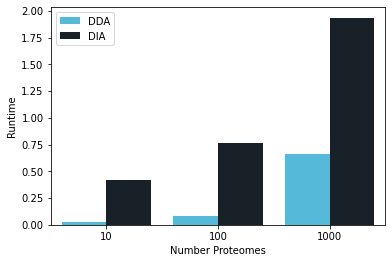

In [12]:
import matplotlib.pyplot as plt

ax = plt.subplot()
all_runs = timed_dda.timed_lfq_runs + timed_dia.timed_lfq_runs #timed_mq_runs
print(all_runs)
RuntimePlotter(all_runs, ax)


In [8]:
import pandas as pd

lfc_report = pd.read_csv("/Users/constantin/workspace/directlfq/test_data/system_tests/Spectronaut_LargeFC/re_run_SN15/20220607_153923_MP-LFC-MS1var-OT-S1-120kMS1_Report.tsv", sep = "\t")
lfc_report["fragion_id"] = lfc_report["FG.Id"].astype("str") + lfc_report["F.FrgIon"].astype("str") + lfc_report["F.FrgLossType"].astype("str") + lfc_report["F.Charge"].astype("str")

In [29]:
lfc_report.to_csv("/Users/constantin/workspace/directlfq/test_data/system_tests/Spectronaut_LargeFC/re_run_SN15/lfcreport_w_fragion_id.tsv", sep = "\t", index = None)